# Pandas grouping exercise

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# note the date fixed to datetime after checking info() , which was showing it as a string
# also note that StateHoliday and SchoolHoliday are not the same type
df = pd.read_csv('../data/train.csv' , low_memory= False , parse_dates= ['Date'])

In [7]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [22]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [21]:
# 1115 stores ...
df['Store'].nunique()

1115

In [16]:
dfg = df.groupby('Store')
dfg

In [17]:
store_avg = dfg.mean()
store_avg.head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282
3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467
4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652
5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590


In [18]:
store_avg = store_avg.reset_index()
store_avg.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,3.997877,3945.704883,467.646497,0.829087,0.382166,0.204883
1,2,3.997877,4122.991507,486.045648,0.832272,0.382166,0.177282
2,3,3.997877,5741.253715,620.286624,0.826964,0.382166,0.180467
3,4,3.997877,8021.769639,1100.057325,0.832272,0.382166,0.183652
4,5,3.997877,3867.110403,444.360934,0.826964,0.382166,0.182590


<AxesSubplot:title={'center':'Avg sales per store'}, xlabel='Store', ylabel='Sales'>

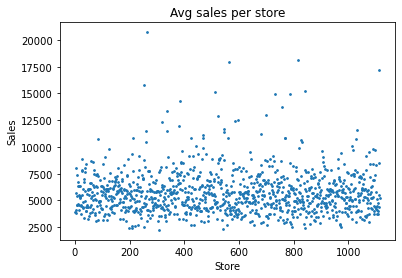

In [19]:
store_avg.plot.scatter('Store' , 'Sales' , s=3 , title = 'Avg sales per store')

# Multiple Groups

In [26]:
store_day = df.groupby(['Store' , 'DayOfWeek'] , as_index= False).mean()
store_day.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
0,1,1,4946.119403,567.768657,0.955224,0.537313,0.223881
1,1,2,4650.918519,545.370370,0.992593,0.533333,0.229630
2,1,3,4454.474074,530.407407,0.977778,0.533333,0.229630
3,1,4,4094.607407,493.407407,0.918519,0.533333,0.222222
4,1,5,4516.414815,537.259259,0.955556,0.533333,0.229630


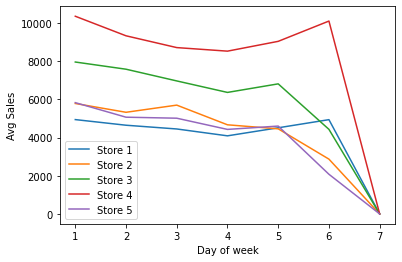

In [29]:
for store in df.Store.unique()[:5]:
    df_tmp = store_day[store_day.Store == store]
    plt.plot(df_tmp.DayOfWeek , df_tmp.Sales , label= f'Store {store}')
plt.xlabel('Day of week')
plt.ylabel('Avg Sales')
plt.legend()